In [102]:
#IMPORTING ALL THE LIBRARIES

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
#READING CSV FILE

df=pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [104]:
df.shape
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [105]:
print(df.isnull().sum())
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [106]:
df.columns = df.columns.str.strip()
#Convert '2' to '1' and '1' to '0'
new_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in new_columns:
    if col in df.columns:
        df[col] = df[col].map({2: 1, 1: 0})

# Convert 'YES' to '1' and 'NO' to '0' for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


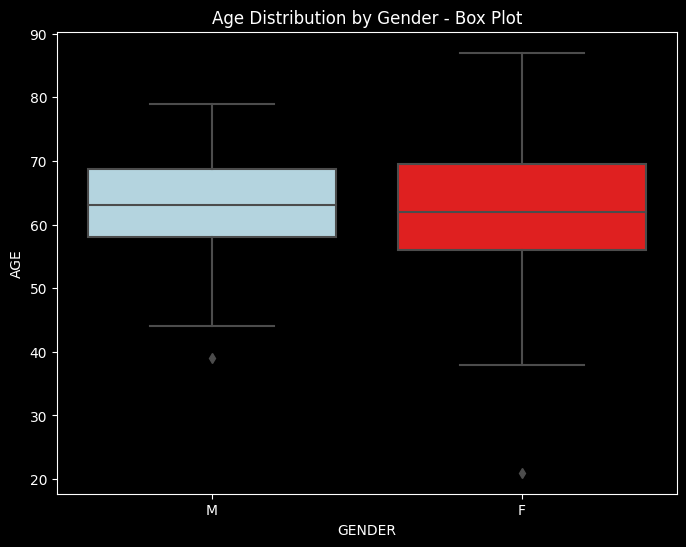

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors as light blue and red
colors = ['lightblue', 'red']

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER', y='AGE', data=df, palette=colors)
plt.title('Age Distribution by Gender - Box Plot')
plt.show()


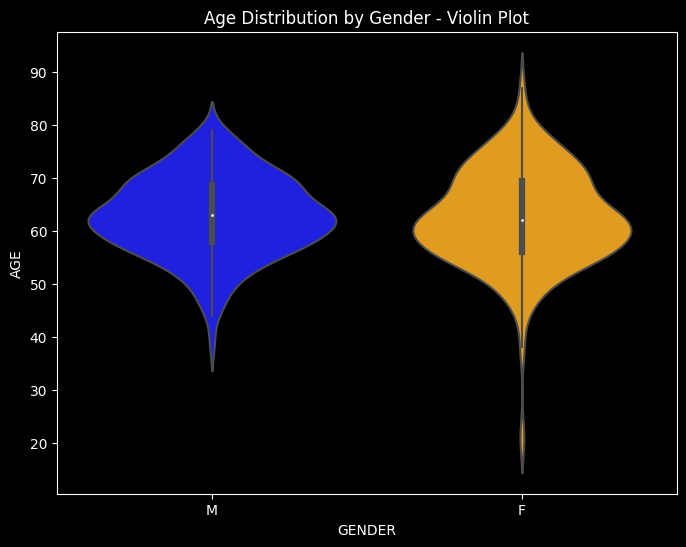

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors as black and orange
colors = ['blue', 'orange']

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='GENDER', y='AGE', data=df, palette=colors)
plt.title('Age Distribution by Gender - Violin Plot')
plt.show()


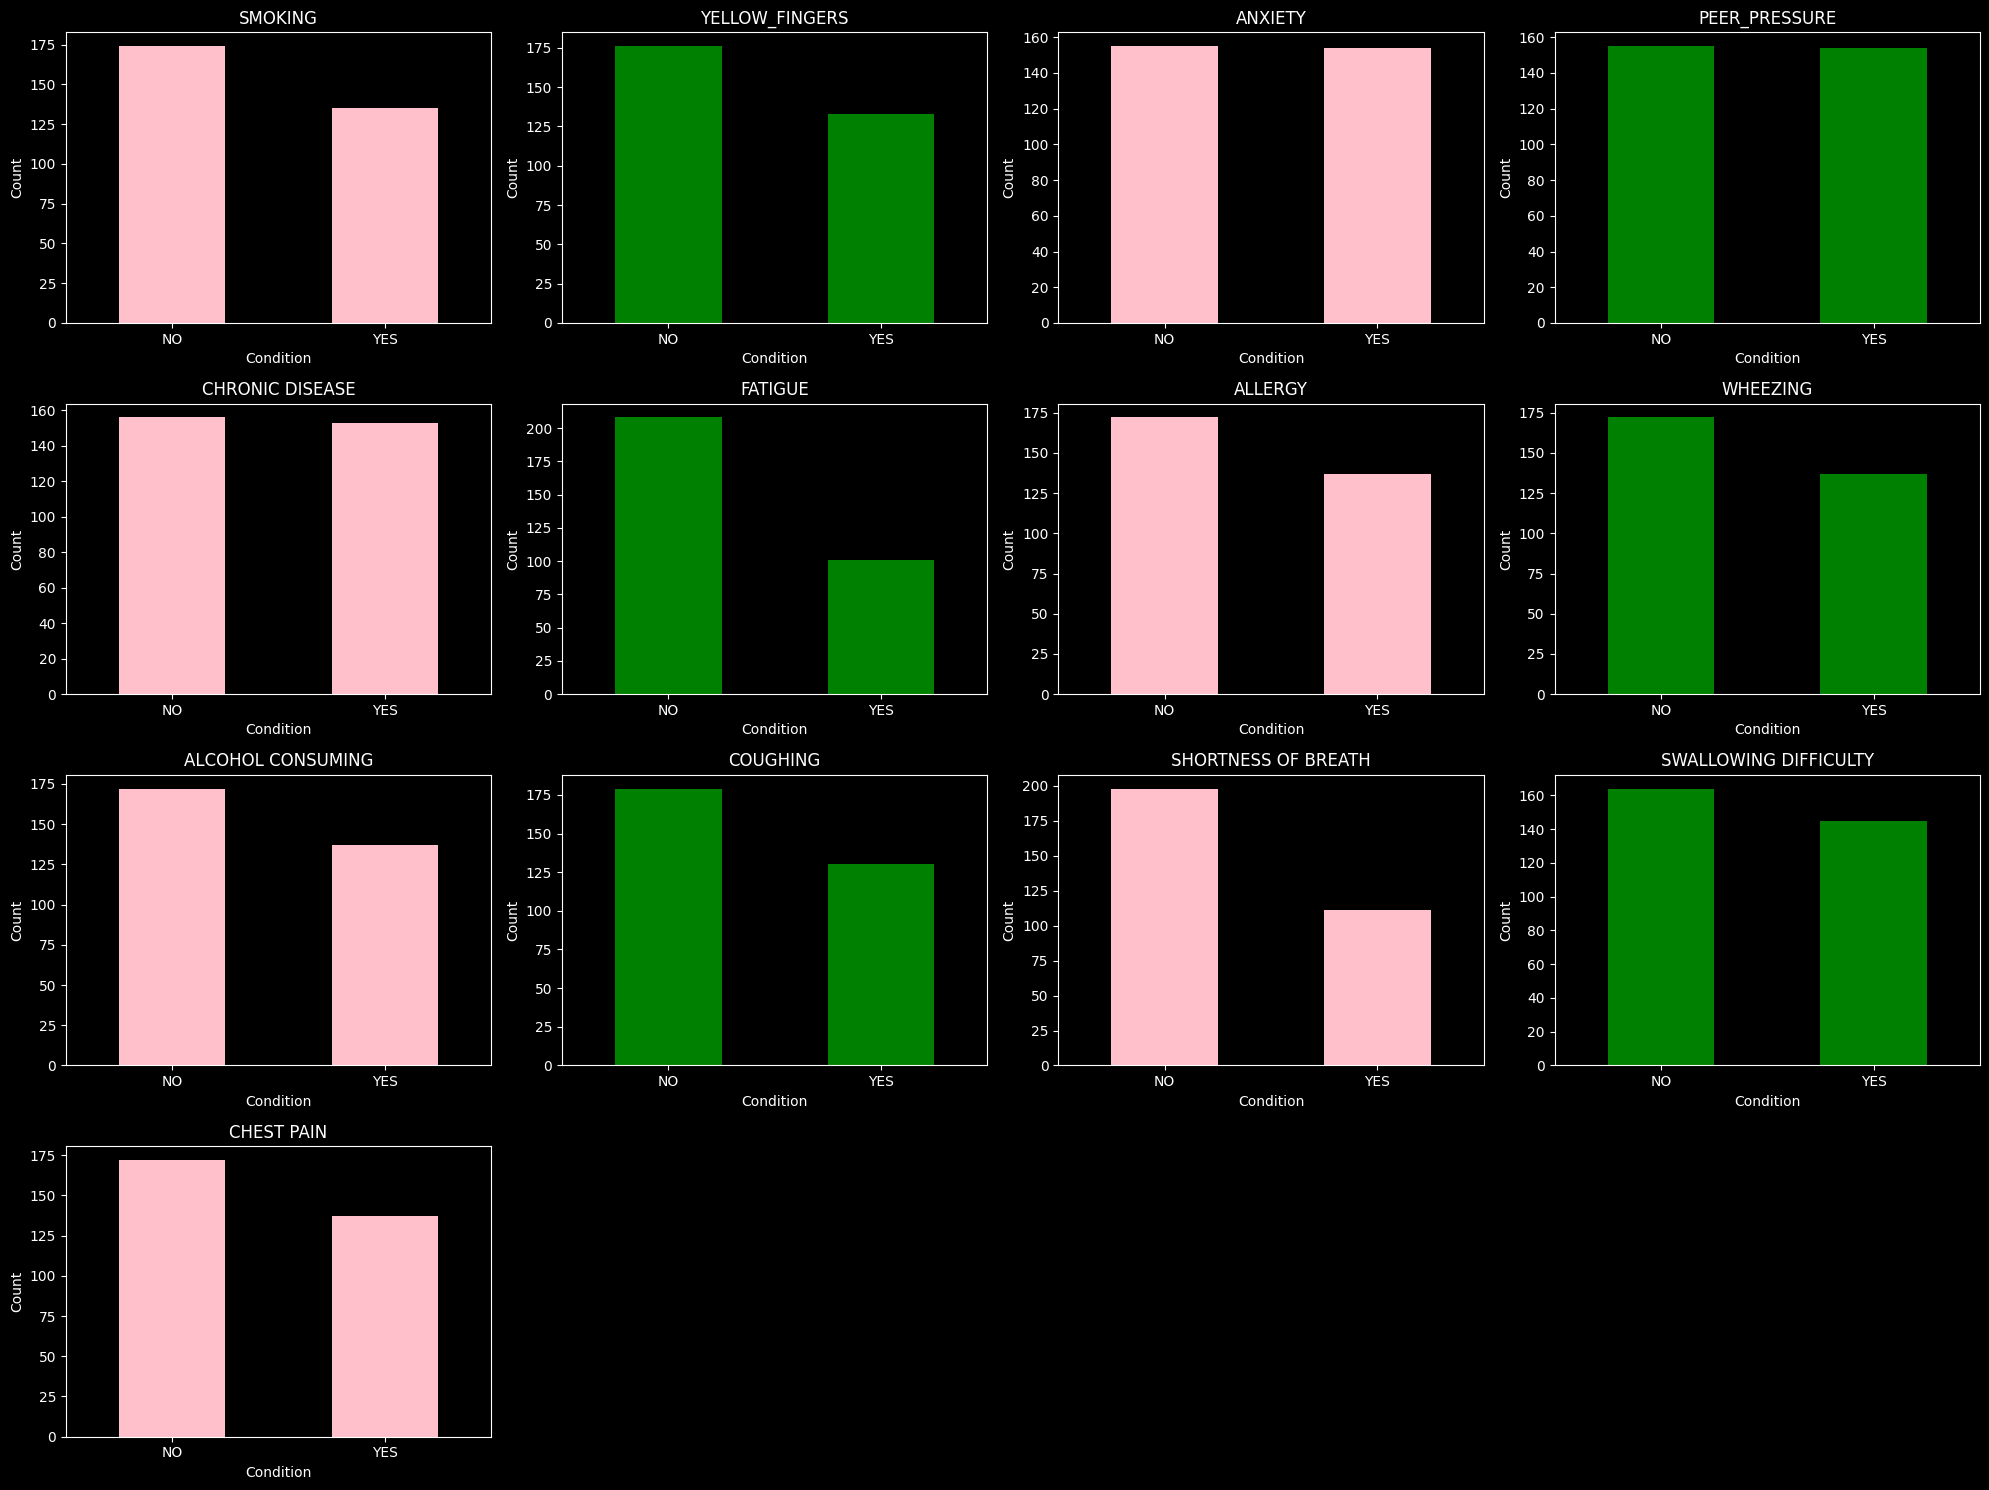

In [109]:
def plot_histograms(dataframe, columns_list):
  plt.figure(figsize=(20, 15))
  colors = ['green', 'pink']  # Define your desired colors
  for i, col in enumerate(columns_list, 1):
    plt.subplot(4, 4, i)
    dataframe[col].value_counts().plot(kind='bar', color=colors[i % len(colors)])  # Use colors cyclically
    plt.title(col)
    plt.xticks([0, 1], ['NO', 'YES'], rotation=0)
    plt.xlabel('Condition')
    plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

plot_histograms(df, new_columns)


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


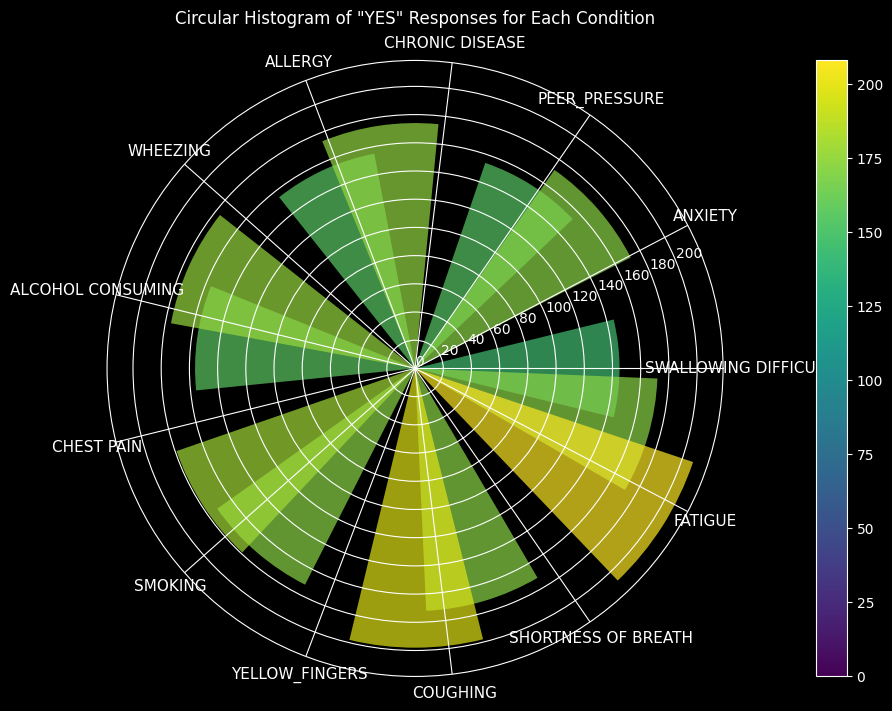

In [110]:
def create_circular_histogram(dataframe, columns_list):
    yes_counts = dataframe[columns_list].sum().sort_values()
    
    
    plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, polar=True)
    width = (2 * np.pi) / len(yes_counts) #Recalculate width
    colors = plt.cm.viridis(yes_counts.values / float(max(yes_counts.values)))


    bars = ax.bar(yes_counts.index, yes_counts.values, width=width, color=colors, alpha=0.7)

 
    ax.set_xticks(np.linspace(0, 2 * np.pi, len(yes_counts), endpoint=False))
    ax.set_xticklabels(yes_counts.index, fontsize=11, rotation=90)
    ax.set_yticks(np.arange(0, max(yes_counts.values), 20))
    ax.set_yticklabels(np.arange(0, max(yes_counts.values), 20))

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, max(yes_counts.values)))
    sm.set_array([])
    plt.colorbar(sm, pad=0.1)
    ax.set_title('Circular Histogram of "YES" Responses for Each Condition', va='bottom')
    ax.grid(True)

    plt.show()

create_circular_histogram(df, new_columns)

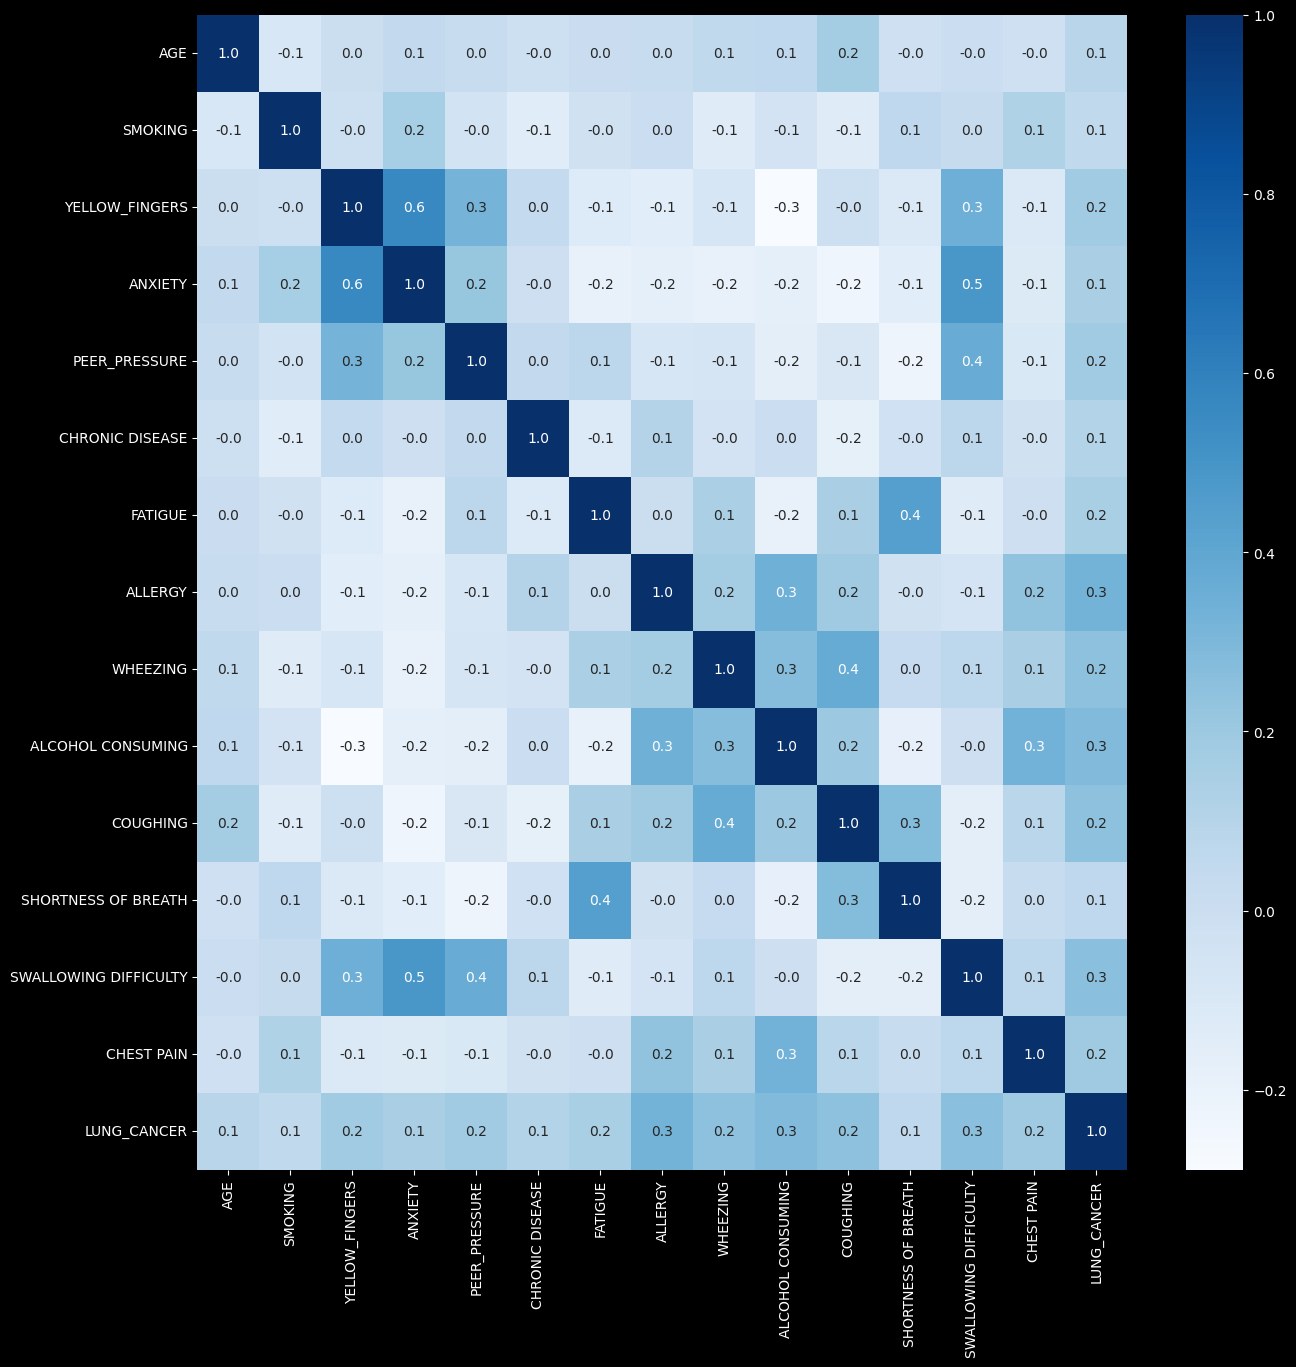

In [111]:
#HEATMAP
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])


plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f')
plt.show()

In [112]:

#FEATURE ENGINEERING




# Binning 'AGE' and One-Hot Encoding for Binned Age
bins = [0, 30, 60, 90]
labels = ['Young', 'Middle', 'Senior']
df['AGE_BINNED'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AGE_BINNED'])

# One-Hot Encoding 'GENDER'
ohe = OneHotEncoder()
df_gender_encoded = ohe.fit_transform(df[['GENDER']]).toarray()
gender_columns = ohe.get_feature_names_out(['GENDER'])
df[gender_columns] = df_gender_encoded

# Drop the original 'GENDER' column
df = df.drop('GENDER', axis=1)

# Interaction between Gender and Smoking
df['GENDER_M_SMOKING'] = df['GENDER_M'] * df['SMOKING']

# Cumulative Risk Score
risk_factors = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']
df['CUMULATIVE_RISK'] = df[risk_factors].sum(axis=1)

# Polynomial Features for Age
df['AGE_SQUARED'] = df['AGE'] ** 2
df['AGE_CUBED'] = df['AGE'] ** 3

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,LUNG_CANCER,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED
0,69,0,1,1,0,0,1,0,1,1,...,1,False,False,True,0.0,1.0,0.0,2,4761,328509
1,74,1,0,0,0,1,1,1,0,0,...,1,False,False,True,0.0,1.0,1.0,2,5476,405224
2,59,0,0,0,1,0,1,0,1,0,...,0,False,True,False,1.0,0.0,0.0,1,3481,205379
3,63,1,1,1,0,0,0,0,0,1,...,0,False,False,True,0.0,1.0,1.0,3,3969,250047
4,63,0,1,0,0,0,0,0,1,0,...,0,False,False,True,1.0,0.0,0.0,1,3969,250047


In [113]:

#KMEANS CLUSTERING

kmeans = KMeans(n_clusters=3)
df['CONDITION_CLUSTER'] = kmeans.fit_predict(df[risk_factors])
df.head()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED,CONDITION_CLUSTER
0,69,0,1,1,0,0,1,0,1,1,...,False,False,True,0.0,1.0,0.0,2,4761,328509,1
1,74,1,0,0,0,1,1,1,0,0,...,False,False,True,0.0,1.0,1.0,2,5476,405224,2
2,59,0,0,0,1,0,1,0,1,0,...,False,True,False,1.0,0.0,0.0,1,3481,205379,0
3,63,1,1,1,0,0,0,0,0,1,...,False,False,True,0.0,1.0,1.0,3,3969,250047,1
4,63,0,1,0,0,0,0,0,1,0,...,False,False,True,1.0,0.0,0.0,1,3969,250047,0


In [114]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix:

[[ 1  1]
 [ 0 60]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62


The Accuracy of Logistic Regression is 98.39 %


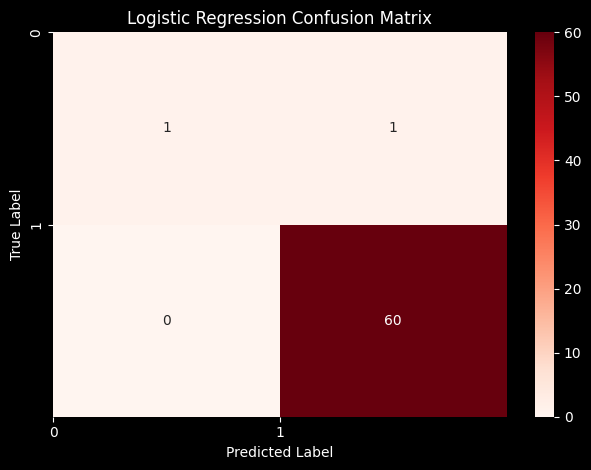

In [115]:
#LOGISTICREGRESSION

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)


lr_acc = round(accuracy_score(y_test, lr_pred) * 100, ndigits=2)


print(f"Confusion Matrix:\n\n{lr_conf}")
print(f"\nClassification Report:\n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")


sns.heatmap(lr_conf, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.xticks(range(len(lr_conf[0])), ["0", "1"], rotation=0)
plt.yticks(range(len(lr_conf)), ["0", "1"])
plt.tight_layout()
plt.show()


Confusion Matrix : 

[[ 0  2]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.98      0.98        60

    accuracy                           0.95        62
   macro avg       0.48      0.49      0.49        62
weighted avg       0.94      0.95      0.94        62


The Accuracy of Gaussian Naive Bayes is 95.16 %


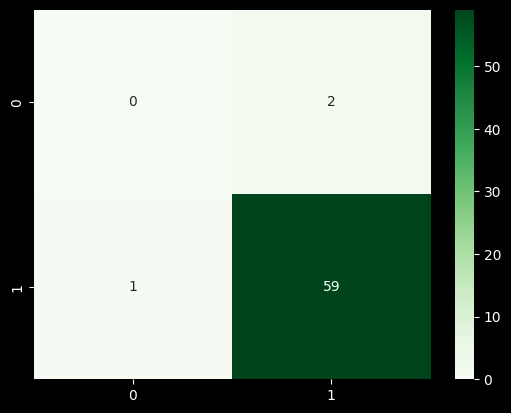

In [116]:

#GAUSSIANNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
sns.heatmap(gnb_conf, annot=True, cmap="Greens", fmt="d")
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

In [117]:

#bERNAULI NB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Bernoulli Naive Bayes is 96.77 %


Confusion Matrix : 

[[ 1  1]
 [ 3 57]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62


The Accuracy of Support Vector Machine is 93.55 %


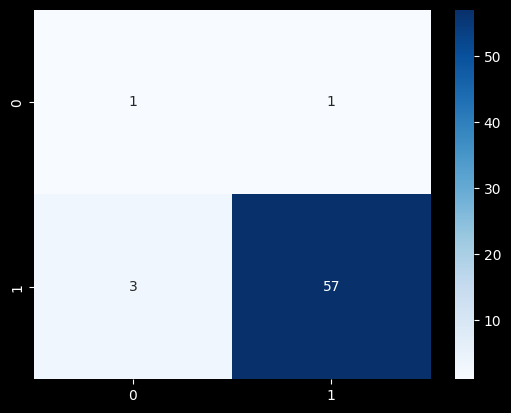

In [118]:
#SVM

svm = SVC(C = 100, gamma = 0.002)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_conf = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_conf, annot=True, cmap="Blues", fmt="d")
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Random Forest Classifier is 96.77 %


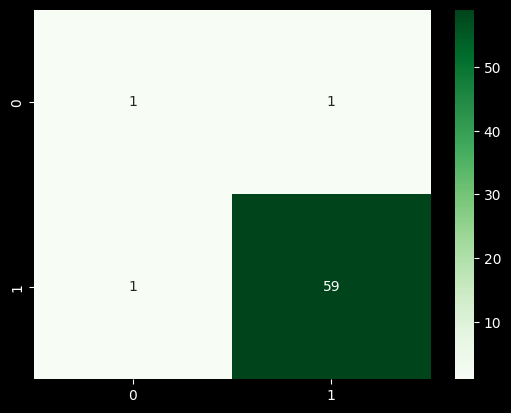

In [119]:
#RANDOMFOREST

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_conf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_conf, annot=True, cmap="Greens", fmt="d")
rf_report = classification_report(y_test, rf_predictions)
rf_acc = round(accuracy_score(y_test, rf_predictions)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rf_conf}")
print(f"\nClassification Report : \n\n{rf_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rf_acc} %")

Confusion Matrix:

[[ 1  1]
 [ 2 58]]

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62


The Accuracy of Decision Tree Classifier is 95.16 %


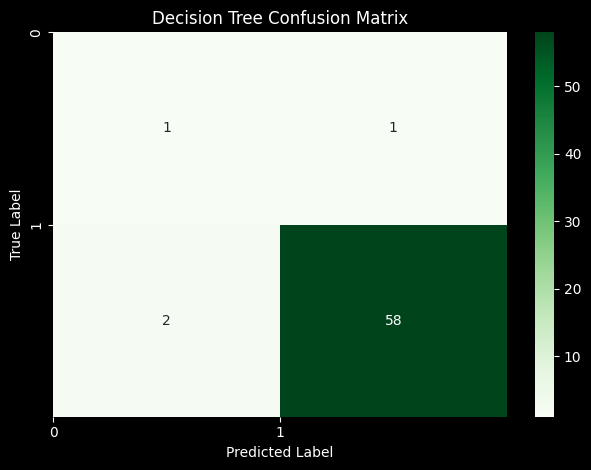

In [120]:
#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


dt_predictions = dt_model.predict(X_test)


dt_conf = confusion_matrix(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)
dt_acc = round(accuracy_score(y_test, dt_predictions) * 100, ndigits=2)


print(f"Confusion Matrix:\n\n{dt_conf}")
print(f"\nClassification Report:\n\n{dt_report}")
print(f"\nThe Accuracy of Decision Tree Classifier is {dt_acc} %")


sns.heatmap(dt_conf, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.xticks(range(len(dt_conf[0])), ["0", "1"], rotation=0)
plt.yticks(range(len(dt_conf)), ["0", "1"])
plt.tight_layout()
plt.show()


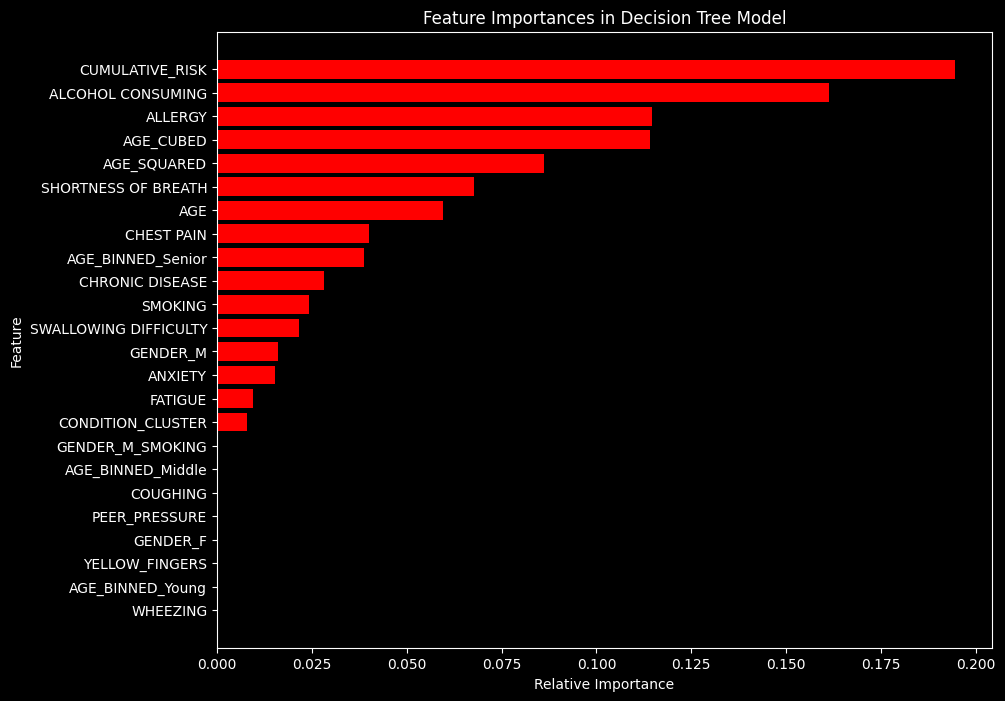

In [138]:
feature_importances = dt_model.feature_importances_


sorted_idx = feature_importances.argsort()


plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color = 'red')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx],)
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

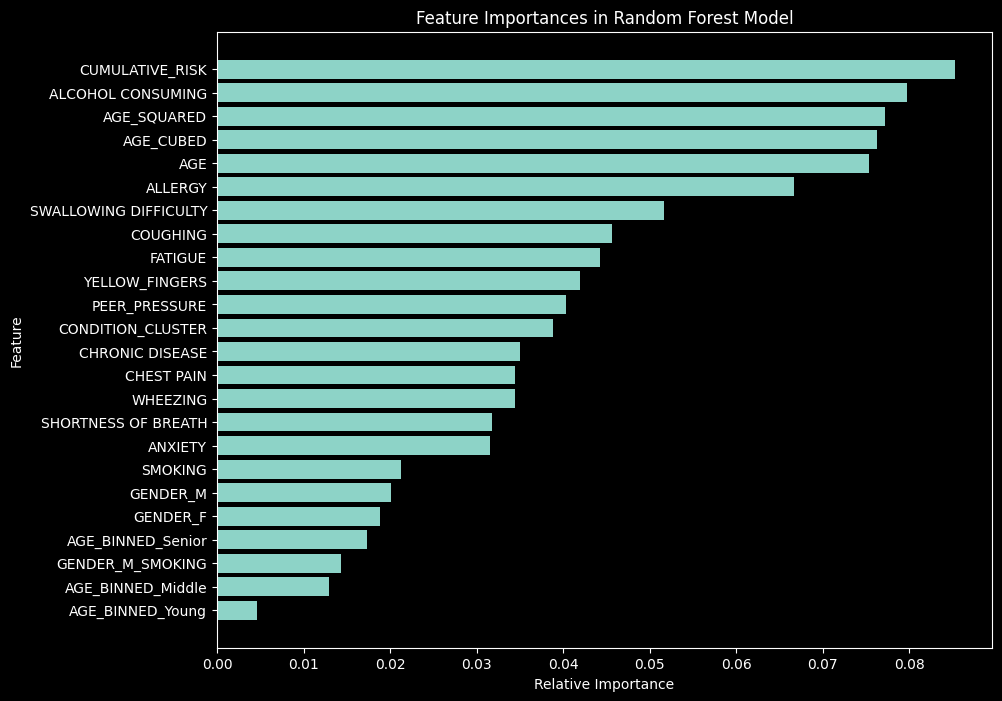

In [132]:
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()


plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine (SVM)": SVC(probability=True),  
    "Bernoulli Naive Bayes": BernoulliNB()
}


model_accuracies = {}
for model_name, model in models.items():
    if model_name == "Support Vector Machine (SVM)":
        accuracy = 0.94  
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
    model_accuracies[model_name] = accuracy


sorted_models = sorted(model_accuracies.items(), key=lambda item: item[1])


print("Models and Accuracies (Ascending Order):")
for model_name, accuracy in sorted_models:
    print(f"{model_name}: {accuracy:.2f}%")



Models and Accuracies (Ascending Order):
Support Vector Machine (SVM): 0.94%
Decision Tree: 0.95%
Gaussian Naive Bayes: 0.95%
Random Forest: 0.97%
Bernoulli Naive Bayes: 0.97%
Logistic Regression: 0.98%


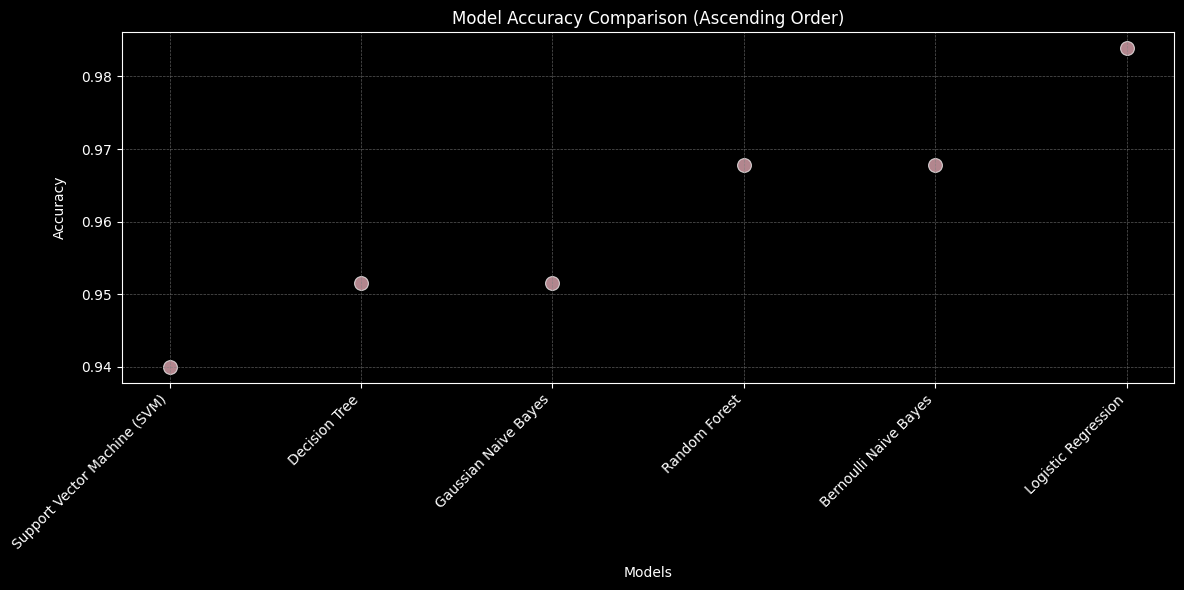

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns



model_names = [model_name for model_name, _ in sorted_models]
accuracies = [accuracy for _, accuracy in sorted_models]


plt.figure(figsize=(12, 6))  

plt.style.use('dark_background')

sns.scatterplot(x=model_names, y=accuracies, color='pink', alpha=0.7, s=100)  

plt.xticks(rotation=45, ha='right')


plt.xlabel("Models", labelpad=10, color='white')  
plt.ylabel("Accuracy", labelpad=10, color='white')
plt.title("Model Accuracy Comparison (Ascending Order)", color='white')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)  
plt.tight_layout()
plt.show()
